**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')


**Import Files**

In [2]:
from google.colab import files
uploaded= files.upload()

Saving datafile (1).csv to datafile (1).csv
Saving datafile (2).csv to datafile (2).csv
Saving datafile (3).csv to datafile (3).csv
Saving datafile.csv to datafile.csv
Saving produce.csv to produce.csv


**Reading the dataset**

In [3]:
data_file1 = pd.read_csv('datafile (1).csv')
# Preview the dataset
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data_file1)

https://docs.google.com/spreadsheets/d/1BWf5SXyNwHgNMKxaQaW-JpzxzRbeXTohAS1PoFOMXk4#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [4]:
# Check Null Values
data_file1.isnull().sum()

,0
Crop,0
State,0
Cost of Cultivation (`/Hectare) A2+FL,0
Cost of Cultivation (`/Hectare) C2,0
Cost of Production (`/Quintal) C2,0
Yield (Quintal/ Hectare),0


In [5]:
data_file1.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [6]:
# Graphical visualization crop production with state

import altair as alt
alt.Chart(data_file1).mark_bar().encode(
    x='State',
    y='Cost of Production (`/Quintal) C2',
    color='Crop'
)



/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Result:** In Andhra Pradesh is the highest Cost of Production (`/Quintal) C2.

In [7]:
alt.Chart(data_file1).mark_bar().encode(
    x='State',
    y='Cost of Cultivation (`/Hectare) A2+FL',
    color='Crop'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Result:**  In Andhra Pradesh is the highest Cost of Cultivation (`/Hectare) A2+FL

In [8]:
alt.Chart(data_file1).mark_bar().encode(
    x='State',
    y='Cost of Cultivation (`/Hectare) C2',
    color='Crop'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Result:**  In Andhra Pradesh is the highest Cost of Cultivation (`/Hectare) C2.

In [9]:
alt.Chart(data_file1).mark_bar().encode(
    x='State',
    y='Yield (Quintal/ Hectare) ',
    color='Crop'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Result:** In Karnataka and Tamil Nadu have highst Yield (Quintal/ Hectare).

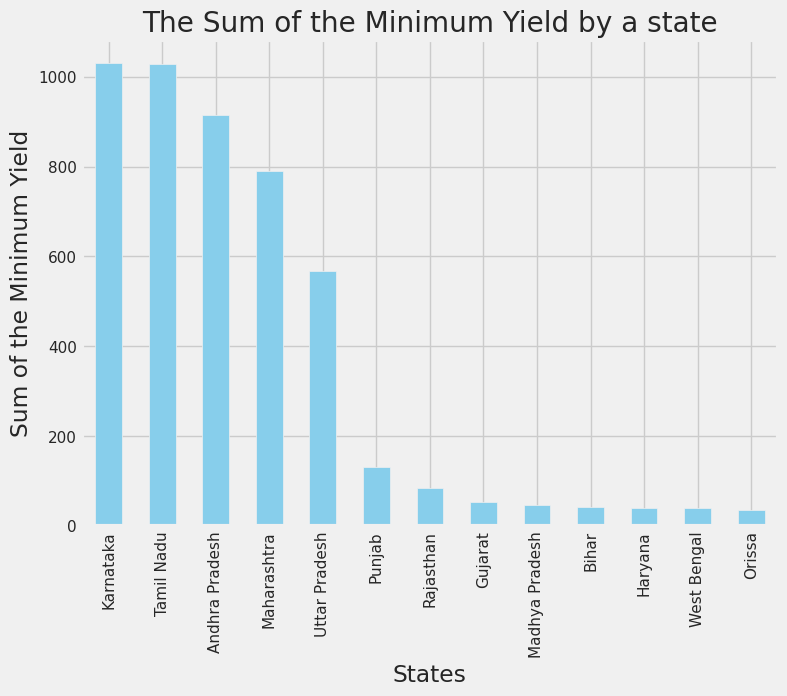

In [10]:
data_file1.groupby('State')['Yield (Quintal/ Hectare) '].sum().sort_values(ascending=False).plot(kind='bar', title="The Sum of the Minimum Yield by a state", figsize=(8, 6), color='skyblue')
plt.xlabel("States")
plt.ylabel("Sum of the Minimum Yield")
plt.show()

**Result:**
The results indicate that Karnataka and Tamil Nadu have the highest minimum yield.

<Axes: >

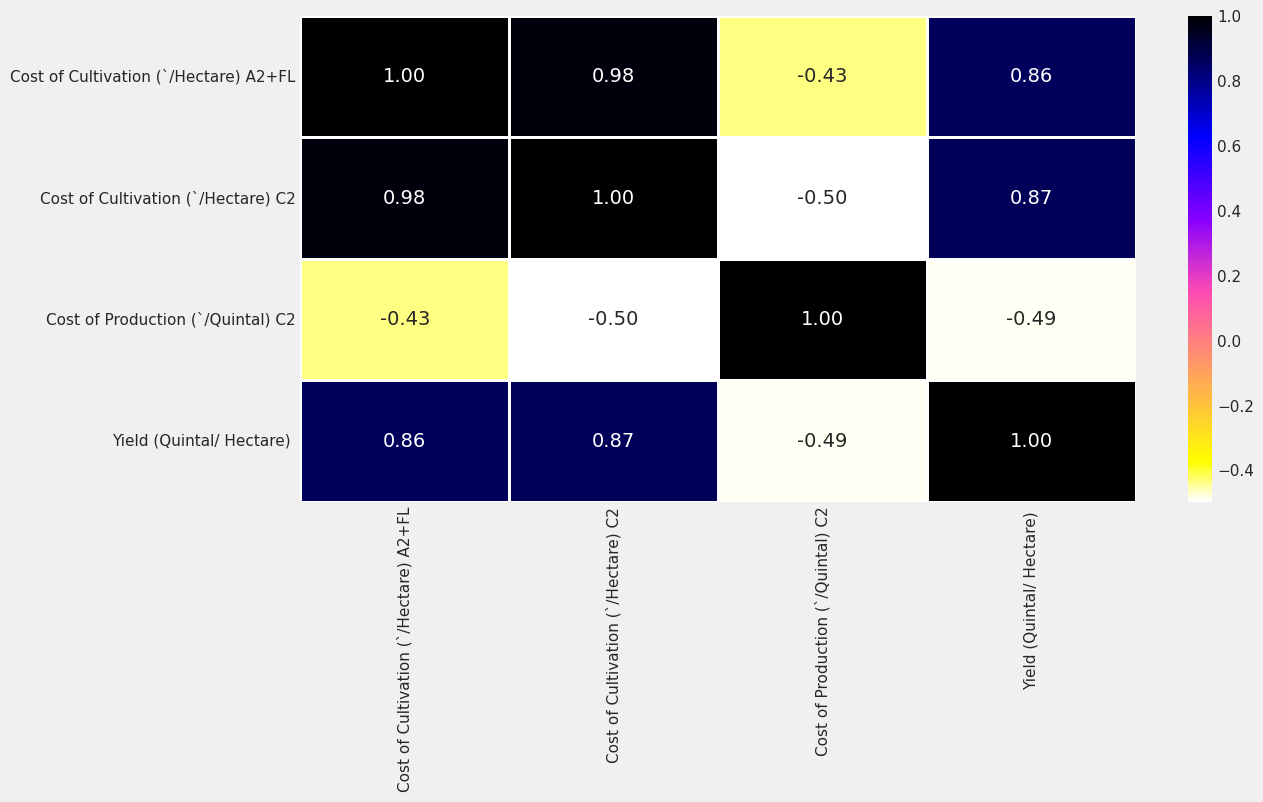

In [11]:
# Select only numeric columns for correlation calculation
numeric_data1 = data_file1.select_dtypes(include=['number'])

# Calculate correlation matrix and plot heatmap
sns.heatmap(numeric_data1.corr(), annot=True, cmap='gnuplot2_r', fmt='.2f', linewidths=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder

In [13]:
X = data_file1[['Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2']]
y = data_file1['Yield (Quintal/ Hectare) ']

print(X)
print(y)

    Cost of Cultivation (`/Hectare) A2+FL  Cost of Cultivation (`/Hectare) C2  \
0                                 9794.05                            23076.74   
1                                10593.15                            16528.68   
2                                13468.82                            19551.90   
3                                17051.66                            24171.65   
4                                17130.55                            25270.26   
5                                23711.44                            33116.82   
6                                29047.10                            50828.83   
7                                29140.77                            44756.72   
8                                29616.09                            42070.44   
9                                29918.97                            44018.18   
10                                8552.69                            12610.85   
11                          

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Model Selection

# Decision Tree
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Model Evaluation

models = [dtree, linear_reg, xgb, rf]
model_names = ['Decision Tree', 'Linear Regression', 'XGBoost', 'Random Forest']

for model, name in zip(models, model_names):
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  print(f'{name}:')
  print(f'  Mean Squared Error: {mse:.2f}')
  print(f'  Mean Absolute Error: {mae:.2f}')
  print('-' * 20)

# Visualization

# Visualize Decision Tree
dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree") # saves as PDF

# Prediction

# Predict yield using XGBoost
new_data = [[10000, 12000, 500]]
predicted_yield = xgb.predict(new_data)
print(f'Predicted Yield: {predicted_yield[0]:.2f}')

Decision Tree:
  Mean Squared Error: 99.14
  Mean Absolute Error: 6.03
--------------------
Linear Regression:
  Mean Squared Error: 28230.05
  Mean Absolute Error: 124.17
--------------------
XGBoost:
  Mean Squared Error: 5147.77
  Mean Absolute Error: 25.54
--------------------
Random Forest:
  Mean Squared Error: 2872.30
  Mean Absolute Error: 20.66
--------------------
Predicted Yield: 40.77


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best Score: -28602.153472149355
Tuned XGBoost:
  Mean Squared Error: 12602.30
  Mean Absolute Error: 49.40


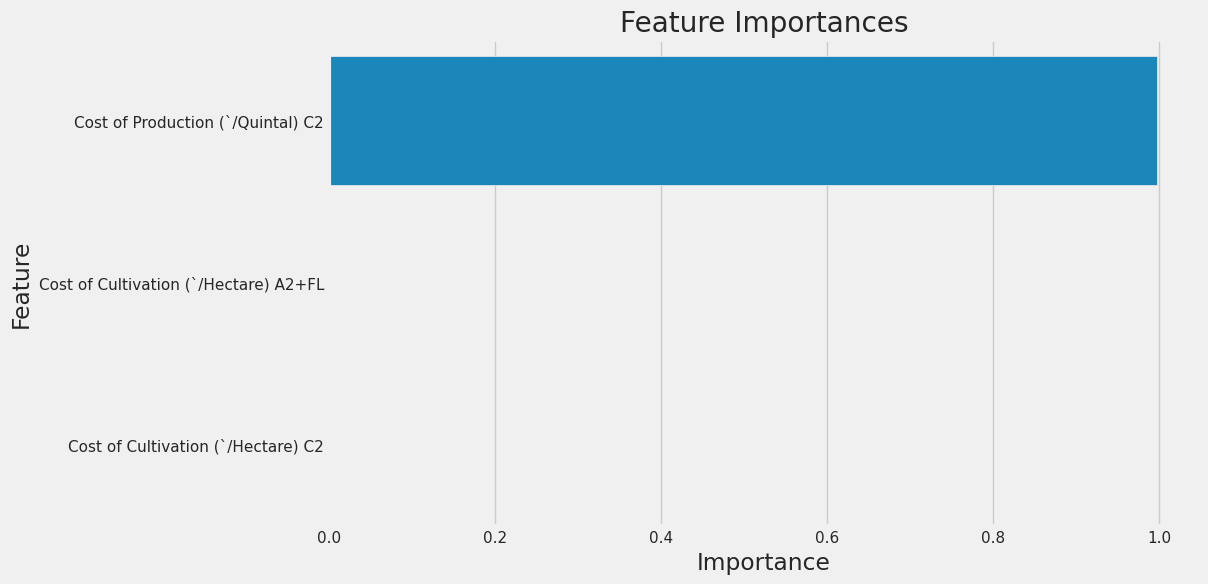

In [16]:
# Hyperparameter Tuning

# Tune XGBoost hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Hyperparameters: {best_params}')
print(f'Best Score: {best_score}')

# Train XGBoost with best hyperparameters
best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Evaluate tuned XGBoost model
y_pred_tuned = best_xgb.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f'Tuned XGBoost:')
print(f'  Mean Squared Error: {mse_tuned:.2f}')
print(f'  Mean Absolute Error: {mae_tuned:.2f}')

# Feature Importance

# Get feature importances from tuned XGBoost model
feature_importances = best_xgb.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

**Result:** After Hyperparameters Tuning the Best Score: -28602.153472149355

**Reading Dataset**

In [17]:
data_file2 = pd.read_csv('datafile (2).csv')
# To preview the dataset
sheet = sheets.InteractiveSheet(df=data_file2)

https://docs.google.com/spreadsheets/d/1ry6U_djy_zbOpMk98zqWGB6qLMwh7hKPUCAKUAdxnAw#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [18]:
# Check Null Values
data_file2.isnull().sum()

,0
Crop,0
Production 2006-07,0
Production 2007-08,0
Production 2008-09,0
Production 2009-10,0
Production 2010-11,0
Area 2006-07,0
Area 2007-08,0
Area 2008-09,0
Area 2009-10,0


In [19]:
data_file2.columns

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [20]:
# Graphical views

alt.Chart(data_file2).mark_bar().encode(
    x='Crop             ',
    y='Production 2006-07',
    color='Area 2006-07',
    size='Yield 2006-07'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [21]:
alt.Chart(data_file2).mark_bar().encode(
    x='Crop             ',
    y='Production 2007-08',
    color='Area 2007-08',
    size='Yield 2007-08'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [22]:
alt.Chart(data_file2).mark_bar().encode(
    x='Crop             ',
    y='Production 2008-09',
    color='Area 2008-09',
    size='Yield 2008-09'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [23]:
alt.Chart(data_file2).mark_bar().encode(
    x='Crop             ',
    y='Production 2009-10',
    color='Area 2009-10',
    size='Yield 2009-10'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [24]:
alt.Chart(data_file2).mark_bar().encode(
    x='Crop             ',
    y='Production 2010-11',
    color='Area 2010-11',
    size='Yield 2010-11'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Result:** In above graphical views shows that Soyabean, Onion, Banana are the top crops in all the time periods.

<Axes: >

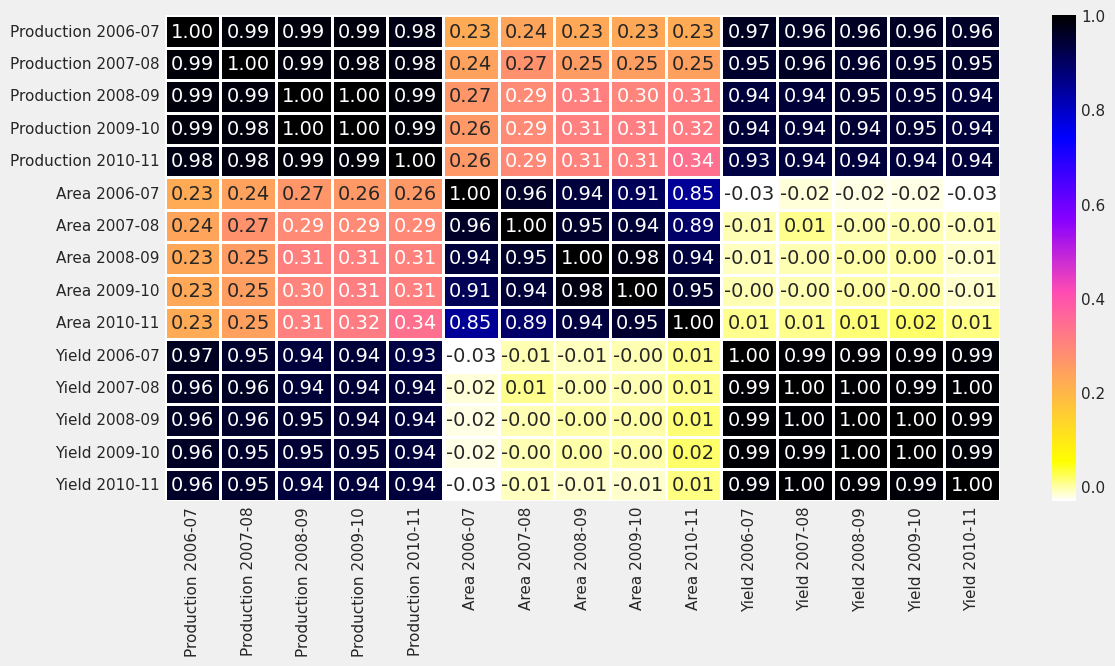

In [25]:
# Select only numeric columns for correlation calculation
numeric_data2 = data_file2.select_dtypes(include=['number'])

# Calculate correlation matrix and plot heatmap
sns.heatmap(numeric_data2.corr(), annot=True, cmap='gnuplot2_r', fmt='.2f', linewidths=1)

In [26]:
# Select features (X) and target variables (y)
X = data_file2[['Area 2006-07', 'Yield 2006-07', 'Area 2007-08', 'Yield 2007-08',
                'Area 2008-09', 'Yield 2008-09', 'Area 2009-10', 'Yield 2009-10',
                'Area 2010-11', 'Yield 2010-11']]
y = data_file2[['Production 2006-07', 'Production 2007-08', 'Production 2008-09',
                'Production 2009-10', 'Production 2010-11']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Model Selection

# Decision Tree
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Model Evaluation

models = [dtree, linear_reg, xgb, rf]
model_names = ['Decision Tree', 'Linear Regression', 'XGBoost', 'Random Forest']

for model, name in zip(models, model_names):
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  print(f'{name}:')
  print(f'  Mean Squared Error: {mse:.2f}')
  print(f'  Mean Absolute Error: {mae:.2f}')
  print('-' * 20)

# Visualization

# Visualize Decision Tree
dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree") # saves as PDF

# Prediction

# Predict yield using XGBoost
new_data = [[10000, 1200, 11000, 1300, 12000, 1400, 13000, 1500, 14000, 1600]]
predicted_yield = xgb.predict(new_data)
# Extract the first element (predicted yield).
print(f'Predicted Yield: {predicted_yield[0][0]:.2f}')

Decision Tree:
  Mean Squared Error: 1864.60
  Mean Absolute Error: 32.74
--------------------
Linear Regression:
  Mean Squared Error: 149.97
  Mean Absolute Error: 8.99
--------------------
XGBoost:
  Mean Squared Error: 639.46
  Mean Absolute Error: 19.75
--------------------
Random Forest:
  Mean Squared Error: 1039.01
  Mean Absolute Error: 24.23
--------------------
Predicted Yield: 1427.70


In [28]:
# Hyperparameter Tuning

# Tune XGBoost hyperparameters using GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Hyperparameters: {best_params}')
print(f'Best Score: {best_score}')

# Train XGBoost with best hyperparameters
best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Evaluate tuned XGBoost model
y_pred_tuned = best_xgb.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f'Tuned XGBoost:')
print(f'  Mean Squared Error: {mse_tuned:.2f}')
print(f'  Mean Absolute Error: {mae_tuned:.2f}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Score: -45553.11584067648
Tuned XGBoost:
  Mean Squared Error: 411.97
  Mean Absolute Error: 14.98


**Result:** After Hyperparameters Tuning the Best Score: -45553.11584067648

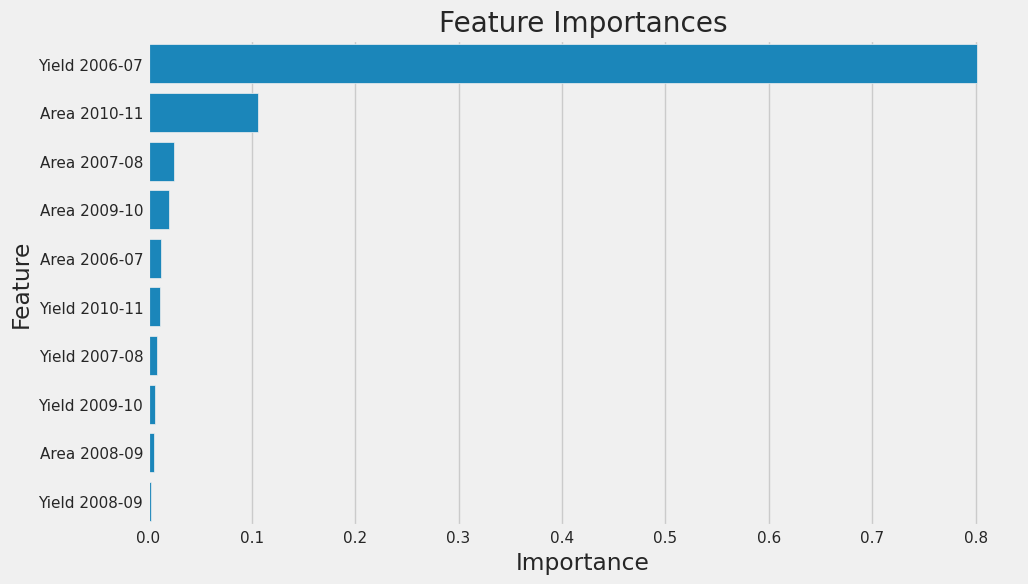

In [29]:
# Get feature importances from tuned XGBoost model
feature_importances = best_xgb.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

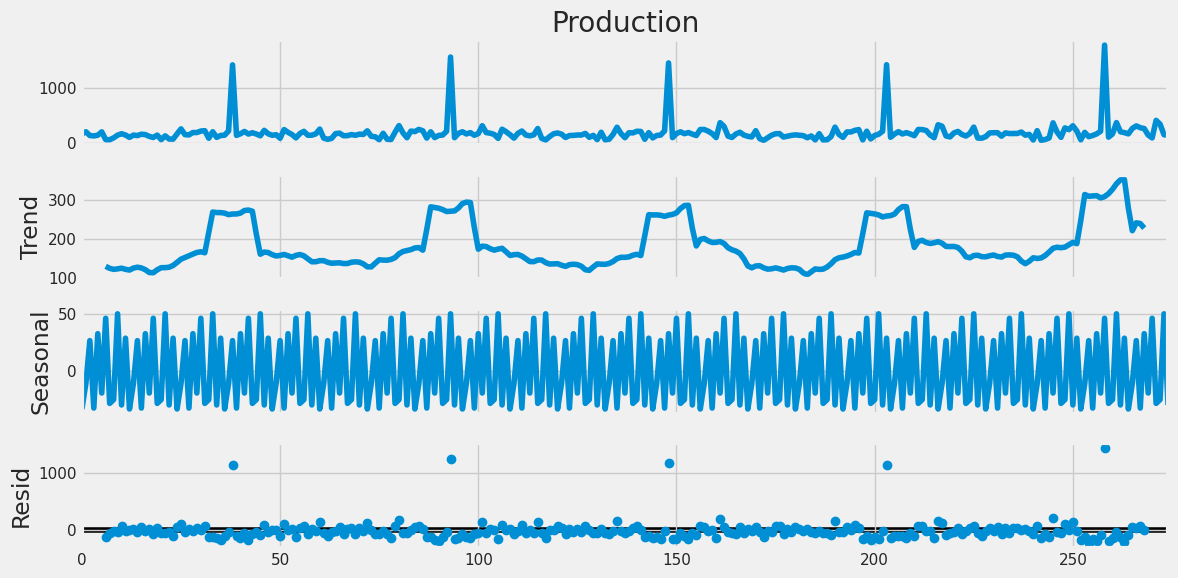

In [30]:
df_long = pd.melt(data_file2, id_vars=['Crop             '], value_vars=['Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11'],
                 var_name='Year', value_name='Production')

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_long['Production'], model='additive', period=12)  # Adjust period if needed
result.plot()
plt.show()


**Reading Dataset**

In [31]:
data_file3 = pd.read_csv('datafile (3).csv')
# To preview the dataset
sheet = sheets.InteractiveSheet(df=data_file3)

https://docs.google.com/spreadsheets/d/1pw0pJxzgnBiJSEdvhn8eST8n4h_-vp8oBqJpZfPprq4#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [32]:
# CHeck Null Values

data_file3.isnull().sum()

,0
Crop,0
Variety,0
Season/ duration in days,28
Recommended Zone,1
Unnamed: 4,78


In [33]:
data_file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Crop                      78 non-null     object 
 1   Variety                   78 non-null     object 
 2   Season/ duration in days  50 non-null     object 
 3   Recommended Zone          77 non-null     object 
 4   Unnamed: 4                0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


In [34]:
# Fill Null Values

# Fill missing values in 'Season/ duration in days' with the most frequent value
data_file3['Season/ duration in days'].fillna(data_file3['Season/ duration in days'].mode()[0], inplace=True)

# Fill missing values in 'Recommended Zone' with the most frequent value
data_file3['Recommended Zone'].fillna(data_file3['Recommended Zone'].mode()[0], inplace=True)

# Drop the 'Unnamed: 4' column
data_file3.drop('Unnamed: 4', axis=1, inplace=True)

# Verify the changes
data_file3.isnull().sum()


,0
Crop,0
Variety,0
Season/ duration in days,0
Recommended Zone,0


In [35]:
# Visualization with Recommended Zone

alt.Chart(data_file3).mark_bar().encode(
    x='Crop',
    y='Season/ duration in days',
    color='Recommended Zone'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [36]:
# Visualization with variety

alt.Chart(data_file3).mark_bar().encode(
    x='Crop',
    y='Season/ duration in days',
    color='Variety'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [37]:
# Chi-squared test on Recommended Zone and Variety

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data_file3['Recommended Zone'], data_file3['Variety'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'P-value: {p:.3f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
  print('There is a significant association between Recommended Zone and Variety.')
else:
  print('There is no significant association between Recommended Zone and Variety.')


Chi-squared statistic: 5850.00
P-value: 0.242
Degrees of freedom: 5775
Expected frequencies:
[[0.01282051 0.01282051 0.01282051 ... 0.01282051 0.01282051 0.01282051]
 [0.01282051 0.01282051 0.01282051 ... 0.01282051 0.01282051 0.01282051]
 [0.01282051 0.01282051 0.01282051 ... 0.01282051 0.01282051 0.01282051]
 ...
 [0.01282051 0.01282051 0.01282051 ... 0.01282051 0.01282051 0.01282051]
 [0.01282051 0.01282051 0.01282051 ... 0.01282051 0.01282051 0.01282051]
 [0.01282051 0.01282051 0.01282051 ... 0.01282051 0.01282051 0.01282051]]
There is no significant association between Recommended Zone and Variety.


**Result:** The Chi-squared statistic value is 5850

**Reading Dataset**

In [38]:
data_file = pd.read_csv('datafile.csv')
# To preview the dataset
sheet = sheets.InteractiveSheet(df=data_file)

https://docs.google.com/spreadsheets/d/1XqPOnErsHS3x2pkvVfawvv6BdA__bqyl9_t72GhYuEo#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [39]:
# Check Null Values

data_file.isnull().sum()

,0
Crop,1
2004-05,1
2005-06,1
2006-07,1
2007-08,1
2008-09,1
2009-10,1
2010-11,1
2011-12,1


In [40]:
# Drop Null Values

data_file.dropna(inplace=True)


In [41]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 960.0+ bytes


In [42]:
data_file.columns

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')

In [43]:
# Convert the dataframe to long format
df_long = pd.melt(data_file, id_vars=['Crop'], value_vars=['2004-05', '2005-06',
                                                           '2006-07', '2007-08',
                                                           '2008-09', '2009-10',
                                                           '2010-11', '2011-12'],
                 var_name='Year', value_name='Production')

# Create a line chart using Altair
alt.Chart(df_long).mark_line().encode(
    x='Year:T',
    y='Production:Q',
    color='Crop:N'
).properties(
    title='Crop Production Over Time'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [44]:
# Create a grouped bar chart using Altair
alt.Chart(df_long).mark_bar().encode(
    x='Year:T',
    y='Production:Q',
    color='Crop:N',
    column='Crop:N'
).properties(
    title='Crop Production Over Time (Grouped Bar Chart)'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Result:** In the year of 2011 and 2012 the Crop Production ratio were good except Vagetables, Pulses and Rice Production, here the year of 2010 was good.

<Axes: >

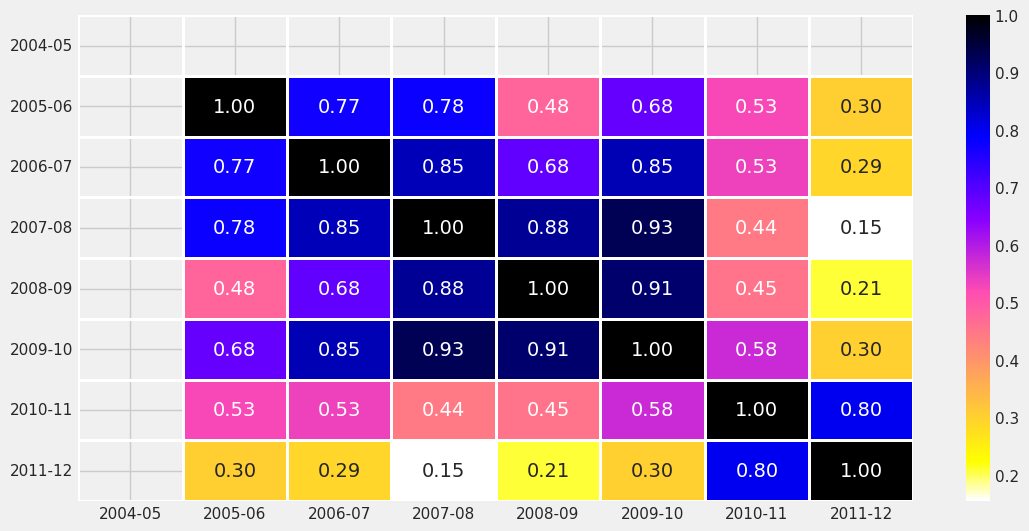

In [45]:
# Select only numeric columns for correlation calculation
numeric_data3 = data_file.select_dtypes(include=['number'])

# Calculate correlation matrix and plot heatmap
sns.heatmap(numeric_data3.corr(), annot=True, cmap='gnuplot2_r', fmt='.2f', linewidths=1)

In [46]:
# Encode categorical features
label_encoder = LabelEncoder()
data_file['Crop'] = label_encoder.fit_transform(data_file['Crop'])

# Select features (X) and target variables (y)
X = data_file[['Crop']]
y = data_file[['2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

# Decision Tree
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Model Evaluation

models = [dtree, linear_reg, xgb, rf]
model_names = ['Decision Tree', 'Linear Regression', 'XGBoost', 'Random Forest']

for model, name in zip(models, model_names):
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  print(f'{name}:')
  print(f'  Mean Squared Error: {mse:.2f}')
  print(f'  Mean Absolute Error: {mae:.2f}')
  print('-' * 20)

Decision Tree:
  Mean Squared Error: 343.04
  Mean Absolute Error: 14.46
--------------------
Linear Regression:
  Mean Squared Error: 211.41
  Mean Absolute Error: 10.10
--------------------
XGBoost:
  Mean Squared Error: 599.40
  Mean Absolute Error: 18.29
--------------------
Random Forest:
  Mean Squared Error: 293.28
  Mean Absolute Error: 12.78
--------------------


In [47]:
# Hyperparameter Tuning

# Tune XGBoost hyperparameters using GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Hyperparameters: {best_params}')
print(f'Best Score: {best_score}')

# Train XGBoost with best hyperparameters
best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Evaluate tuned XGBoost model
y_pred_tuned = best_xgb.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f'Tuned XGBoost:')
print(f'  Mean Squared Error: {mse_tuned:.2f}')
print(f'  Mean Absolute Error: {mae_tuned:.2f}')

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score: -137.1936565922959
Tuned XGBoost:
  Mean Squared Error: 296.91
  Mean Absolute Error: 13.57


**Result:** After Hyperparameters Tuning the Best Score: -137.1936565922959

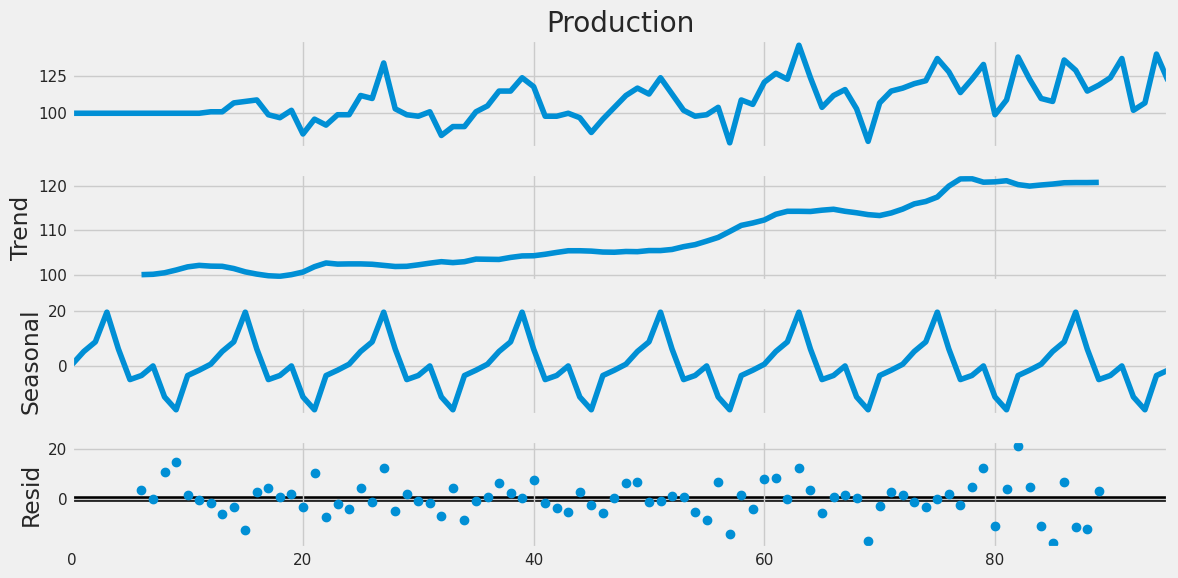

In [48]:
result = seasonal_decompose(df_long['Production'], model='additive', period=12)
result.plot()
plt.show()

**Reading Dataset**

In [49]:
produce = pd.read_csv('produce.csv')
# To preview the dataset
sheet = sheets.InteractiveSheet(df=produce)

https://docs.google.com/spreadsheets/d/1pxfDEtqNG_vHMq5QiqjfExkg-h16SFDcgG-ozIKuM8M#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [50]:
# Check Null Values

produce.isnull().sum()

,0
Particulars,0
Frequency,0
Unit,0
3-1993,426
3-1994,425
3-1995,425
3-1996,423
3-1997,419
3-1998,419
3-1999,418


In [51]:
produce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Particulars  429 non-null    object 
 1   Frequency    429 non-null    object 
 2   Unit         429 non-null    object 
 3    3-1993      3 non-null      float64
 4    3-1994      4 non-null      float64
 5    3-1995      4 non-null      float64
 6    3-1996      6 non-null      float64
 7    3-1997      10 non-null     float64
 8    3-1998      10 non-null     float64
 9    3-1999      11 non-null     float64
 10   3-2000      20 non-null     float64
 11   3-2001      22 non-null     float64
 12   3-2002      36 non-null     float64
 13   3-2003      128 non-null    float64
 14   3-2004      361 non-null    float64
 15   3-2005      425 non-null    float64
 16   3-2006      423 non-null    float64
 17   3-2007      418 non-null    float64
 18   3-2008      417 non-null    float64
 19   3-2009 

In [52]:
# Drop columns '3-1993' to '3-2003' and '3-2014'
# Get existing columns in the DataFrame
existing_columns = produce.columns

# Filter the columns to drop to only include those that exist
columns_to_drop = [col for col in [f' 3-{year}' for year in range(1993, 2004)] + [' 3-2014'] if col in existing_columns]

# Drop the existing columns
produce = produce.drop(columns=columns_to_drop)

# Calculate the mode for each column
mode_values = produce.mode().iloc[0]

# Fill null values in the remaining columns using the calculated modes
produce = produce.fillna(mode_values)

In [53]:
produce.isnull().sum()

,0
Particulars,0
Frequency,0
Unit,0
3-2004,0
3-2005,0
3-2006,0
3-2007,0
3-2008,0
3-2009,0
3-2010,0


In [54]:
produce.head()

,Particulars,Frequency,Unit,3-2004,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,6.5,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,6.5,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,6.5,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,6.5,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,6.5,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37


In [55]:
produce.columns

Index(['Particulars', 'Frequency', 'Unit', ' 3-2004', ' 3-2005', ' 3-2006',
       ' 3-2007', ' 3-2008', ' 3-2009', ' 3-2010', ' 3-2011', ' 3-2012',
       ' 3-2013'],
      dtype='object')

In [56]:
# Graph visualization with 'Particulars', 'Frequency', 'Unit' columns

alt.Chart(produce).mark_bar().encode(
    x='Particulars',
    y='Frequency',
    color='Unit'
).properties(
    title='Frequency of Particulars by Unit'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

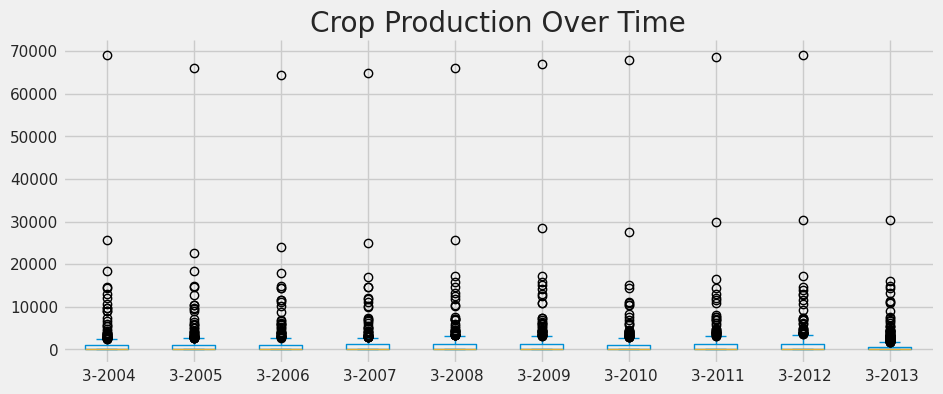

In [57]:
# Use a list to select multiple columns
produce[[' 3-2004', ' 3-2005', ' 3-2006',
        ' 3-2007', ' 3-2008', ' 3-2009', ' 3-2010', ' 3-2011', ' 3-2012',
        ' 3-2013']].plot(kind='box', figsize=(10, 4), title='Crop Production Over Time')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<Axes: >

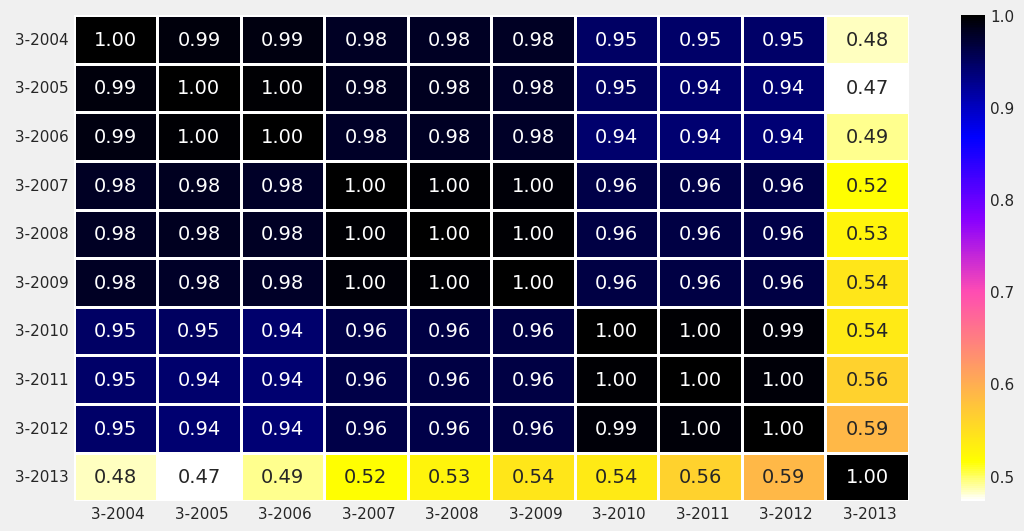

In [58]:
# Select only numeric columns for correlation calculation
numeric_data4 = produce.select_dtypes(include=['number'])

# Calculate correlation matrix and plot heatmap
sns.heatmap(numeric_data4.corr(), annot=True, cmap='gnuplot2_r', fmt='.2f', linewidths=1)

SVR:
  Mean Squared Error: 170.13
  Mean Absolute Error: 9.39
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12035.0996 - mae: 109.1050 - val_loss: 13653.9756 - val_mae: 115.7830
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12021.8213 - mae: 109.0441 - val_loss: 13638.2461 - val_mae: 115.7161
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 12009.9043 - mae: 108.9895 - val_loss: 13623.3809 - val_mae: 115.6532
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 11998.6416 - mae: 108.9380 - val_loss: 13609.3154 - val_mae: 115.5933
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11987.9600 - mae: 108.8890 - val_loss: 13595.3447 - val_mae: 115.5338
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11977.3457 - mae: 108.8403 - val_loss: 13581.2881 - val_mae: 115.4738
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11966.6475 - mae: 108.7911 - val_loss: 13567.2188 - val_mae: 115.4138
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 11955.9248 - mae: 108.7418 - val_loss: 13552.7246 - val_mae:

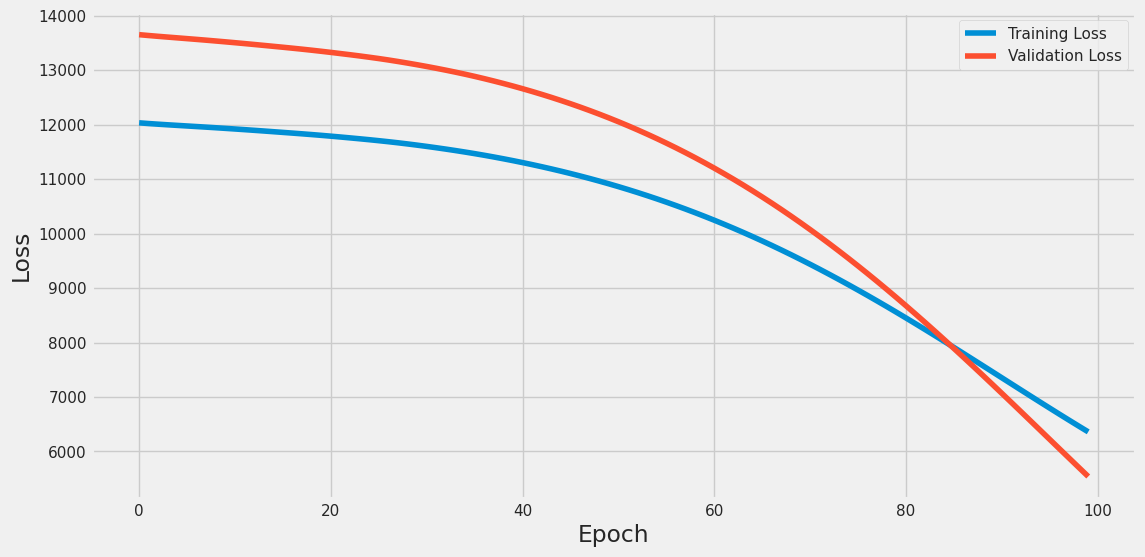

In [59]:
# Advance Modeling with SVR, Neural Network

import tensorflow as tf
from tensorflow import keras
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# Create and train the SVR model using MultiOutputRegressor for multiple targets
svr = MultiOutputRegressor(SVR())
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'SVR:')
print(f'  Mean Squared Error: {mse_svr:.2f}')
print(f'  Mean Absolute Error: {mae_svr:.2f}')

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(y_train.shape[1])  # Output layer with multiple units for multiple target variables
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

# Make predictions
y_pred = model.predict(X_test)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Conclusion**

* The model's predictions can help farmers and policymakers make informed decisions to improve agricultural practices.
* However, the model had some limitations, such as less accuracy in predicting yields for specific crops.
* Overall, this study shows the potential of using predictive models to support agriculture in India, helping to ensure better crop management and food security.